In [83]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [227]:
mean = np.array([4, 2])
covariance = np.array([
    [1.44, -.702],
    [-.702, .81]
    ])

In [233]:
# in real life, I'd use:

# from scipy.stats import multivariate_normal
# my_MVN = multivariate_normal(mean=mean, cov=covariance).pdf

# here is the by-hand version, which should give the same output

def multivariate_normal(x, mean, cov):
    dim = np.array(mean).shape[-1]
    
    normalization = (2 * np.pi)**(- dim/2) / np.sqrt(np.linalg.det(cov))

    precision_matrix = np.linalg.inv(cov)

    argument = np.sum((x-mean)@precision_matrix *(x-mean), axis=-1)

    return normalization * np.exp(- 1/2 * argument)

my_MVN = partial(multivariate_normal, mean=mean, cov=covariance)

In [234]:
x_array = np.linspace(1, 7, 200)
y_array = np.linspace(0, 4, 200)
x, y = np.meshgrid(x_array, y_array)
positions = np.stack((x, y), axis=-1)

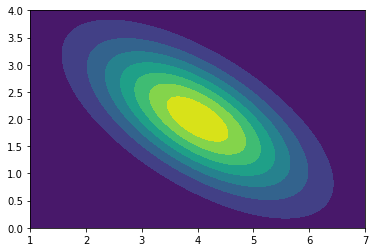

In [235]:
z = my_MVN(positions)

plt.contourf(x, y, z)

In [236]:
def marginalize_MVN(index, mean, covariance):


    marginal_mean = mean[index]
    marginal_cov = covariance[index, index]

    return partial(multivariate_normal, mean=[marginal_mean], cov=[[marginal_cov]])

def condition_MVN(index, mean, covariance):
    # in the special case of conditioning on the mean value of all the other parameters,
    # for simplicity

    precision_matrix = np.linalg.inv(covariance)
    conditioned_cov = 1 / precision_matrix[index, index]
    
    conditioned_mean = mean[index]

    return partial(multivariate_normal, mean=[conditioned_mean], cov=[[conditioned_cov]])

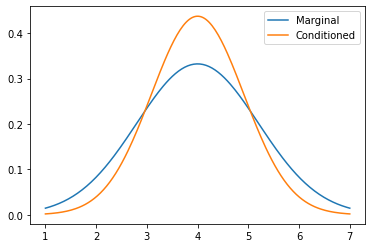

In [237]:
marginal_x = marginalize_MVN(0, mean, covariance)
conditioned_x = condition_MVN(0, mean, covariance)

plt.plot(x_array, marginal_x(x_array[:, np.newaxis]), label='Marginal')
plt.plot(x_array, conditioned_x(x_array[:, np.newaxis]), label='Conditioned')

plt.legend()

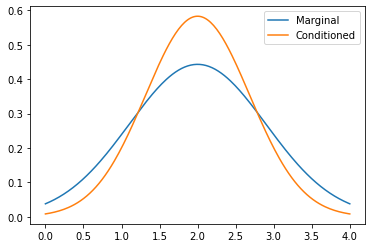

In [239]:
marginal_y = marginalize_MVN(1, mean, covariance)
conditioned_y = condition_MVN(1, mean, covariance)

plt.plot(y_array, marginal_y(y_array[:, np.newaxis]), label='Marginal')
plt.plot(y_array, conditioned_y(y_array[:, np.newaxis]), label='Conditioned')

plt.legend()